In [119]:
%matplotlib inline

import random
import string
import timeit
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
from scipy.stats import expon

spSent = list('methinks it is like a weasel')

In [120]:
#List of lowercase letters
Ltr = list(string.ascii_lowercase)
Ltr.append(' ')

# Function 1: generate random lowercase letters
def makeRandSent(r=Ltr):
    randSent = []
    for i in range(28):
        randSent.append(random.choice(r))
    return(randSent)

In [121]:
makeRandSent()

['k',
 'c',
 'e',
 'g',
 'p',
 'w',
 't',
 'q',
 'l',
 'm',
 'g',
 'j',
 'j',
 'e',
 'w',
 'f',
 'n',
 'm',
 'p',
 't',
 'n',
 'u',
 ' ',
 'p',
 's',
 'g',
 'h',
 'y']

In [122]:
def scoreIt(testSent,truthSent):
    testScore = 0
    idxMatch = []
    for i in range(len(truthSent)):
        if truthSent[i] == testSent[i]:
            testScore+=1
            idxMatch.append(i)
    #return testScore
    #print testScore, idxMatch
    return testScore, idxMatch


In [123]:
scoreIt(makeRandSent(),spSent)

(1, [19])

In [124]:
def iterateScore(truthSent):
    for  i in range(10):
        scoreIt(makeRandSent(),truthSent)

In [125]:
iterateScore(spSent)

### Now refine the function. First, allow the random string function to input known index positions. Then do an iterative updating process.

In [126]:
def improveCurrSent(knownIdx=[],r=Ltr,truthSent=spSent):
    currSent = ['*' for i in range(28)]
    if len(knownIdx)>0:
        for i in knownIdx:
            currSent[i] = truthSent[i]
    #print ''.join(currSent)
    return currSent
    
    #for i in range(28):
    #    randSent.append(random.choice(r))
    #return(randSent)

In [127]:
#improveCurrSent(knownIdx=[1,2])

In [128]:
df = pd.DataFrame(columns=['iterations', 'score', 'steps'])
df

,iterations,score,steps


In [129]:
# Working

def iterateScore(truthSent,resultPrint=False):
    df = pd.DataFrame(columns=['iterations', 'score', 'steps'])
    rollingScore = 0
    steps = []
    knownIdx = []
    i=0
    while rollingScore < 28:
        i += 1
        currSent = improveCurrSent(knownIdx)
        currScore, currIdx = scoreIt(makeRandSent(),spSent)
        newEntry = 0
        for j in currIdx:
            if j not in knownIdx:
                knownIdx.append(j)
                rollingScore += 1
                newEntry += 1
                if resultPrint != False:
                    print 'Score: ' + str(rollingScore), 'Iterations: ' + str(i)  
                    print 'Sentence: ' + ''.join(improveCurrSent(knownIdx=knownIdx)), '\n'
        if newEntry > 0:
            steps.append(newEntry)
    return steps

In [130]:
# In progress

def iterateScore(truthSent,resultPrint=False, runID=0):
    df = pd.DataFrame(columns=['iterations', 'score'])
    rollingScore = 0
    steps = []
    knownIdx = []
    i=0
    while rollingScore < 28:
        i += 1
        currSent = improveCurrSent(knownIdx)
        currScore, currIdx = scoreIt(makeRandSent(),spSent)
        newEntry = 0
        if len(currIdx) == 0:
            df.loc[i,'iterations'] = i
            df.loc[i,'score'] = rollingScore
        for j in currIdx:
            if j not in knownIdx:
                knownIdx.append(j)
                rollingScore += 1
                newEntry += 1
                if resultPrint != False:
                    print 'Score: ' + str(rollingScore), 'Iterations: ' + str(i)  
                    print 'Sentence: ' + ''.join(improveCurrSent(knownIdx=knownIdx)), '\n'
            df.loc[i,'iterations'] = i
            df.loc[i,'score'] = rollingScore
        #if newEntry > 0:
        #    steps.append(newEntry)
    #return steps
    df.loc[:,'runID']=runID
    return df

In [131]:
iterateScore(spSent,resultPrint=False)

,iterations,score,runID
1,1,2,0
2,2,3,0
3,3,3,0
4,4,5,0
5,5,6,0
6,6,6,0
7,7,6,0
8,8,8,0
9,9,9,0
10,10,13,0


In [132]:
def multiplexScores(numRuns):
    df = pd.DataFrame()
    for i in range(numRuns):
        tempDf = iterateScore(spSent,resultPrint=False,runID = i)
        df = df.append(tempDf)
    return df


In [170]:
df=multiplexScores(500)
df=df.reset_index(drop=True)
df

,iterations,score,runID
0,1,1,0
1,2,2,0
2,3,4,0
3,4,5,0
4,5,5,0
5,6,7,0
6,7,7,0
7,8,7,0
8,9,7,0
9,10,9,0


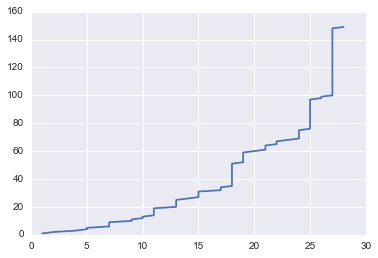

In [171]:
#plt(df.loc[:,'score'],df.loc[:,'iterations'])
#sns.pointplot(x=df[df.runID==0].loc[:,'score'],y=df[df.runID==0].loc[:,'iterations'])
plt.plot(df[df.runID==0].loc[:,'score'],df[df.runID==0].loc[:,'iterations'])

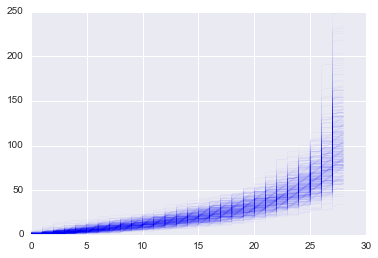

In [135]:
uniqIds = list(set(df.loc[:,'runID']))
#?sns.pointplot
for i in uniqIds:
    plt.plot(df[df.runID==i].loc[:,'score'],df[df.runID==i].loc[:,'iterations'], \
    alpha=0.1, linewidth=0.2, color='blue')

#?plt.plot(dates, values, '-o')

#sns.pointplot(x=df[df.runID==0].loc[:,'score'],y=df[df.runID==0].loc[:,'iterations'])

In [150]:
df.head
isinstance(df.loc[:,'iterations'],int)

False

In [162]:
len(df.loc[100,'score'])


241

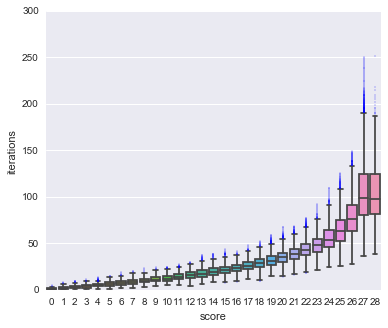

In [209]:
fig = plt.figure(figsize=(6,5), dpi=1600)
#sns.regplot(x='score',y='iterations',data=df)

ax = sns.boxplot(x='score',y='iterations',data=df,order=range(29), fliersize=1)
#ax = sns.boxplot(y='score',x='iterations',data=df,order=range(29), fliersize=1)

#ax.set_xlabel('Sentence score',fontsize=16)
#ax.set_ylabel('Total compensation',fontsize=16)

#ax = sns.stripplot(x="score", y="iterations", data=df, order=range(29), size=0.4, jitter=True, edgecolor="gray")

In [197]:
isinstance(df.iloc[5]['iterations'],int)


True

In [210]:
df.iloc[1]['score']

iterations    2
score         2
runID         0
Name: 1, dtype: object

In [211]:
df.head()

,iterations,score,runID
0,1,1,0
1,2,2,0
2,3,4,0
3,4,5,0
4,5,5,0


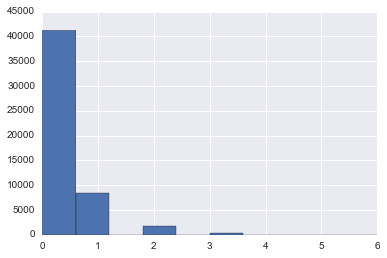

In [251]:
#df.iloc[1:len(df)]['score']-df.iloc[0:(len(df)-1)]['score']
steps = df.iloc[1:len(df)].reset_index(drop=True)['score'] - df.iloc[0:(len(df)-1)].reset_index(drop=True)['score']
steps = steps[steps>-1]
x, y, _ = plt.hist(steps)

#plt.show()

In [249]:
_

array([  4.12100000e+04,   8.51100000e+03,   0.00000000e+00,
         1.82200000e+03,   0.00000000e+00,   3.52000000e+02,
         4.40000000e+01,   0.00000000e+00,   1.00000000e+01,
         1.00000000e+00])

In [238]:
np.log(steps)

AttributeError: 'int' object has no attribute 'log'

In [214]:
df.iloc[0:(len(df)-1)]['score']

0         1
1         2
2         4
3         5
4         5
5         7
6         7
7         7
8         7
9         9
10        9
11       10
12       10
13       11
14       11
15       11
16       11
17       11
18       11
19       13
20       13
21       13
22       13
23       13
24       13
25       14
26       15
27       15
28       15
29       15
         ..
52419    26
52420    26
52421    26
52422    26
52423    26
52424    26
52425    26
52426    26
52427    26
52428    26
52429    26
52430    26
52431    26
52432    26
52433    26
52434    26
52435    26
52436    26
52437    26
52438    26
52439    26
52440    26
52441    26
52442    26
52443    26
52444    27
52445    27
52446    27
52447    27
52448    27
Name: score, dtype: object